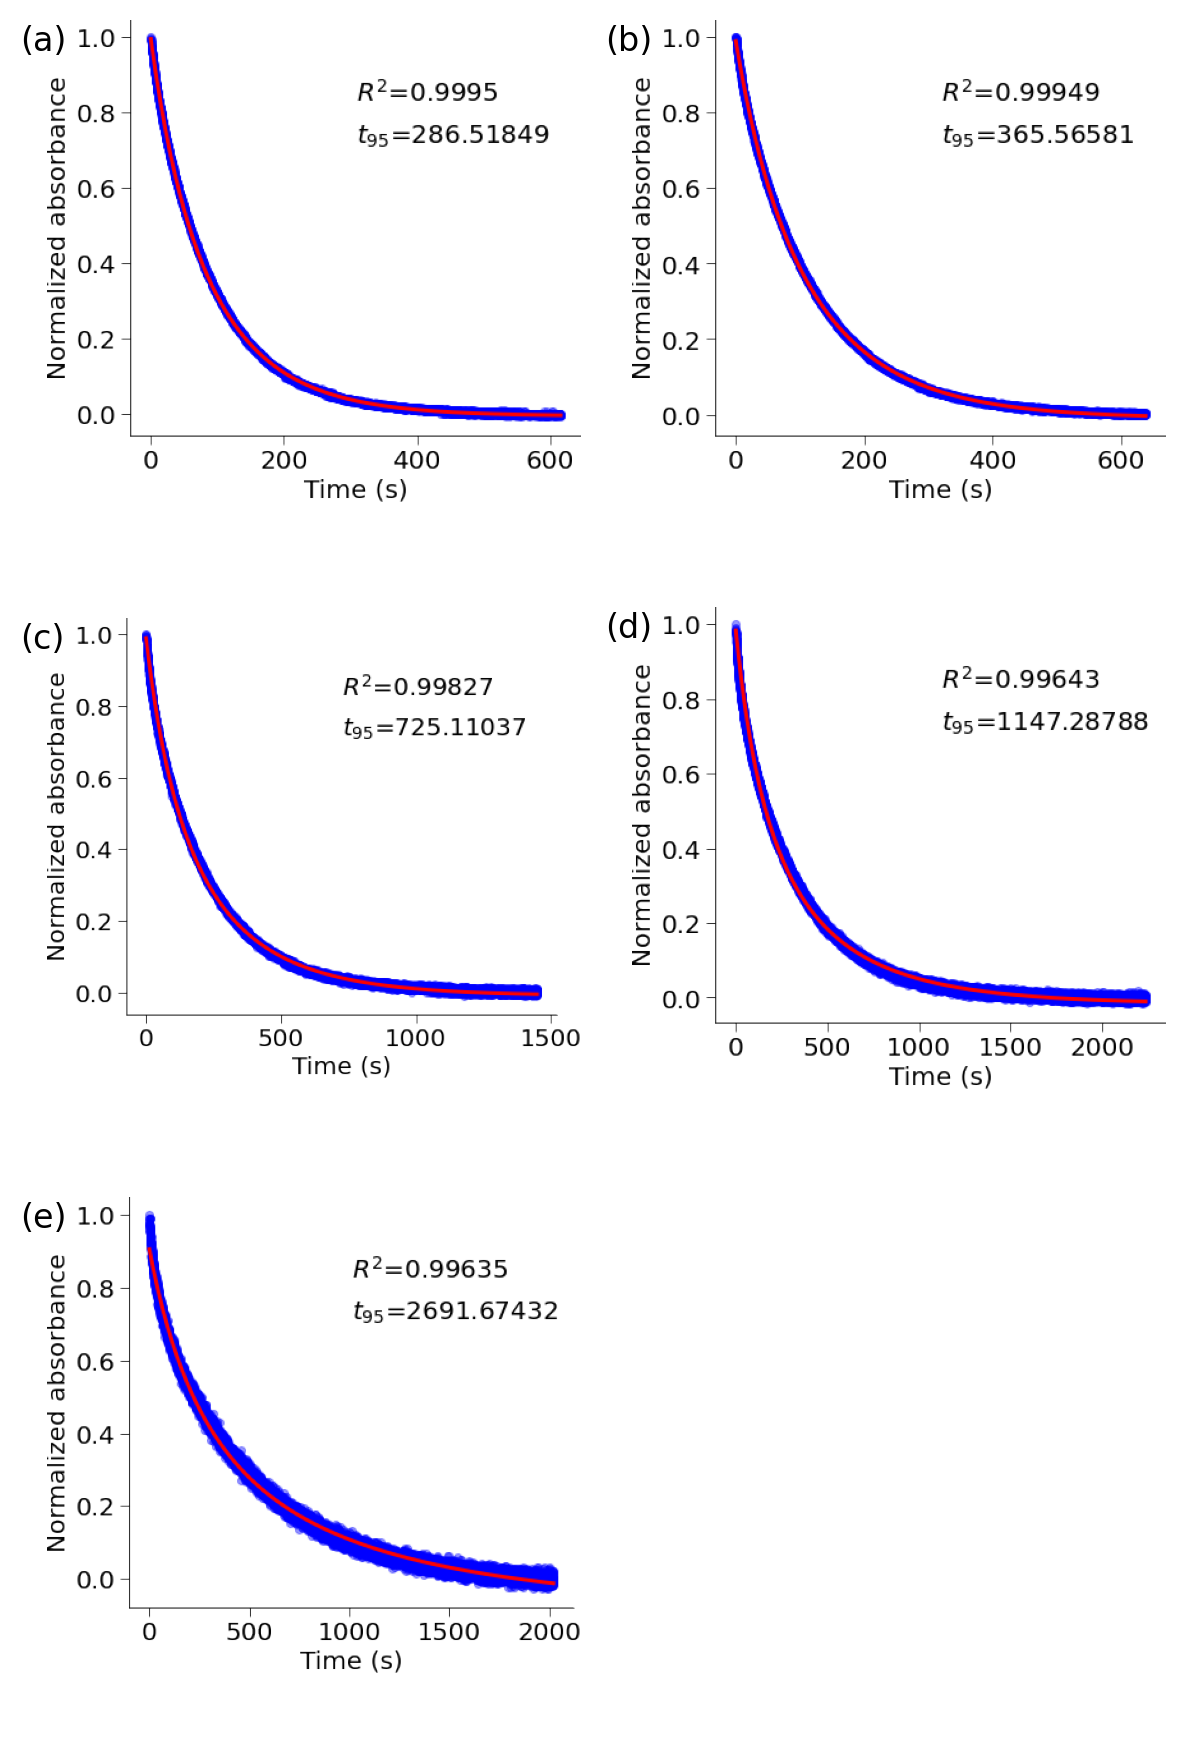

In [109]:
# fig_resultのファイルをまとめてくれるプログラム

from PIL import Image
import os
import re
import matplotlib.pyplot as plt

# 画像ファイルが保存されているフォルダのパス
image_folder = "../result/SPA_reanalyze_from_scv/rac-C2/-7/extracted_result/fig_result/"

# 画像ファイルの拡張子
image_extension = ".png"

# 画像ファイルのリストを取得し、ファイル名でソート
image_files = [file for file in os.listdir(image_folder) if file.endswith(image_extension)]
sorted_image_files = sorted(image_files, key=lambda x: [int(s) if s.isdigit() else s for s in re.split(r'(\d+)', x)])

# 画像ファイルの数と配置
rows, cols = 3, 2

# DPIと画像サイズの設定
dpi = 200
fig, axes = plt.subplots(rows, cols, figsize=(cols*3, rows*3), dpi=dpi)
fig.patch.set_alpha(0)  # 背景を透明に設定

# 画像を読み込んで表示
for i, ax in enumerate(axes.flat):
    if i < len(sorted_image_files):
        image_path = os.path.join(image_folder, sorted_image_files[i])
        img = Image.open(image_path)
        ax.imshow(img)
        
        # テキストボックスの位置調整
        bbox_props = dict(boxstyle="round,pad=0.3", edgecolor="white", facecolor="white")
        ax.text(-0.05, 0.99, "({})".format(chr(97 + i)), transform=ax.transAxes, fontsize=12, va='top', ha='left', bbox=bbox_props)
        
        ax.axis('off')
    else:
        ax.axis('off')

# レイアウト調整
plt.tight_layout()

# 画像をファイルとして保存
result_dir = image_folder + "summary/"
os.makedirs(result_dir, exist_ok=True)
output_filename = "output_image.png"  # 保存するファイル名
plt.savefig(result_dir + output_filename, dpi=dpi, transparent=True)  # 背景を透明に設定

plt.show()


# 全部処理できたら、一つのフォルダにまとめる。

In [110]:
from PIL import Image
import os
import shutil

# 画像フォルダの親ディレクトリ
parent_folder = "../result/SPA_reanalyze_from_scv/rac-C2/"

# 温度リスト
temperatures = [-7, 0, 7, 15, 22, 30]

# データが存在するフォルダからの相対パス
source_folder = "extracted_result/fig_result/summary"

# 出力先フォルダ
output_folder = "fit_result/"
os.makedirs(parent_folder + output_folder, exist_ok=True)

# 各温度の画像をコピーしてリネーム
for temp in temperatures:
    source_path = os.path.join(parent_folder, str(temp), source_folder, "output_image.png")
    if os.path.exists(source_path):
        output_filename = f"{temp}_output_image.png"
        output_path = os.path.join(parent_folder, output_folder, output_filename)
        shutil.copyfile(source_path, output_path)
        print("画像のコピーとリネームが完了しました。")


画像のコピーとリネームが完了しました。
画像のコピーとリネームが完了しました。
画像のコピーとリネームが完了しました。
画像のコピーとリネームが完了しました。
画像のコピーとリネームが完了しました。
画像のコピーとリネームが完了しました。
